# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Load data

In [2]:
#load data from spreadsheet into array
data_file_in = open("all_samples_data.csv", "r")
#ndmin to force 2d array even if there is one row
all_data = np.array(np.loadtxt(data_file_in, delimiter=",", skiprows=1), ndmin=2)
data_file_in.close()

#mask to allow only points with nonzero values of xrr thickness
mask = np.array(all_data[0:,1], dtype=bool)

# simple linear regression
since an x/y linear regression can be solved analytically with no trouble, it's easier for me to just do it here instead of figuring out all the calls to `scipy.optimize`

In [3]:
def simpleLinReg(x, y):
    x_mean = np.average(x)
    y_mean = np.average(y)

    slope = np.sum( (x - x_mean)*(y - y_mean) ) / np.sum( (x - x_mean)**2 )
    intercept = y_mean - slope*x_mean

    return slope, intercept

# Plot line intensities vs. xrr thickness

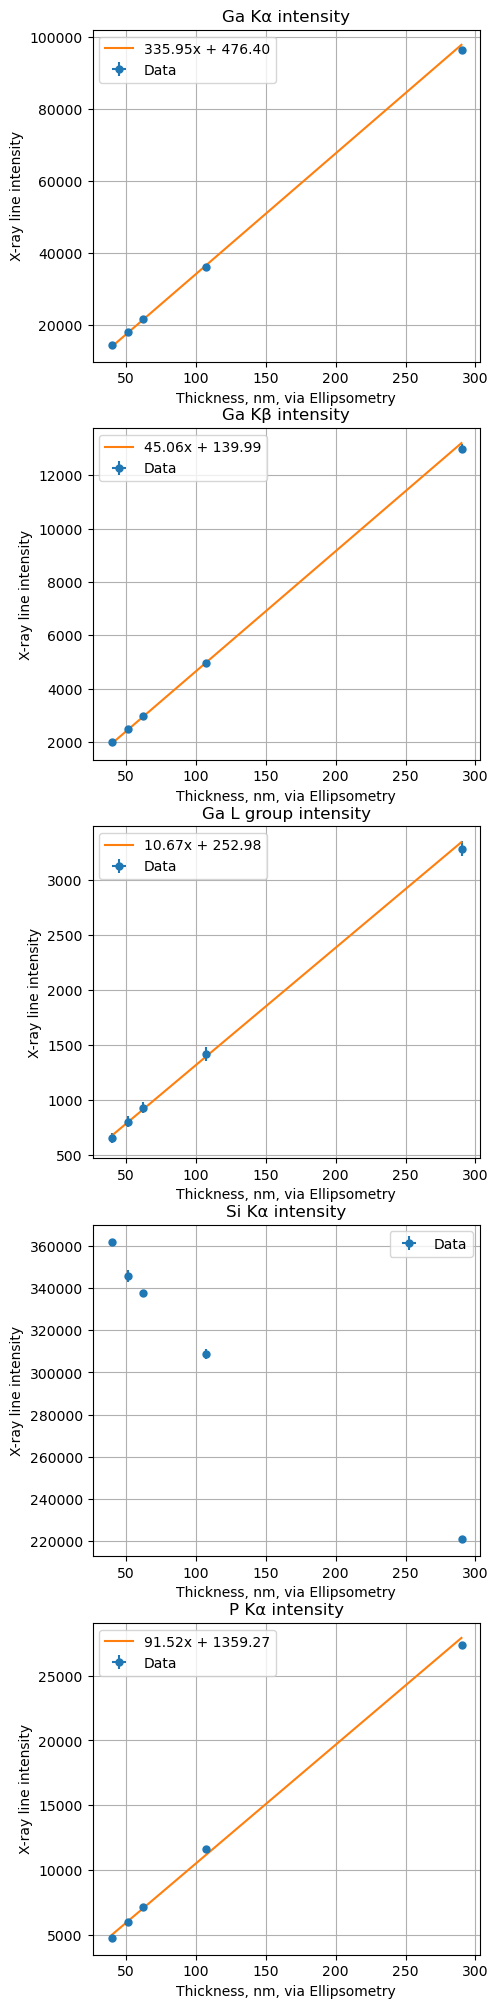

In [6]:
f, axs = plt.subplots(nrows=5, ncols=1, figsize=(5, 25))

ms = 10 #marker size
                      
axs[0].errorbar(all_data[0:, 1][mask], all_data[0:, 5][mask], xerr=all_data[0:, 2][mask], yerr = all_data[0:, 10][mask],
            linestyle="None", marker=".", markersize=ms, label = "Data")

axs[1].errorbar(all_data[0:, 1][mask], all_data[0:, 6][mask], xerr=all_data[0:, 2][mask], yerr = all_data[0:, 11][mask],
            linestyle="None", marker=".", markersize=ms, label = "Data")

axs[2].errorbar(all_data[0:, 1][mask], all_data[0:, 7][mask], xerr=all_data[0:, 2][mask], yerr = all_data[0:, 12][mask],
            linestyle="None", marker=".", markersize=ms, label = "Data")

axs[3].errorbar(all_data[0:, 1][mask], all_data[0:, 8][mask], xerr=all_data[0:, 2][mask], yerr = all_data[0:, 13][mask],
            linestyle="None", marker=".", markersize=ms, label = "Data")
#axs[3].set_yscale("log")

axs[4].errorbar(all_data[0:, 1][mask], all_data[0:, 9][mask], xerr=all_data[0:, 2][mask], yerr = all_data[0:, 14][mask],
            linestyle="None", marker=".", markersize=ms, label = "Data")

fit_ga_ka = simpleLinReg(all_data[0:,3][mask], all_data[0:,5][mask])
fit_ga_kb = simpleLinReg(all_data[0:,3][mask], all_data[0:,6][mask])
fit_ga_l  = simpleLinReg(all_data[0:,3][mask], all_data[0:,7][mask])
fit_p_ka  = simpleLinReg(all_data[0:,3][mask], all_data[0:,9][mask])

axs[0].plot(np.linspace(40, 290), np.linspace(40, 290)*fit_ga_ka[0] + fit_ga_ka[1],
            label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_ka))
axs[1].plot(np.linspace(40, 290), np.linspace(40, 290)*fit_ga_kb[0] + fit_ga_kb[1],
           label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_kb))
axs[2].plot(np.linspace(40, 290), np.linspace(40, 290)*fit_ga_l[0] + fit_ga_l[1],
           label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_l))
axs[4].plot(np.linspace(40, 290), np.linspace(40, 290)*fit_p_ka[0] + fit_p_ka[1],
           label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_p_ka))

titles = ["Ga K\u03b1 intensity",
          "Ga K\u03b2 intensity",
          "Ga L group intensity",
          "Si K\u03b1 intensity",
          "P K\u03b1 intensity"]

for i in range(0, axs.size):
    axs[i].grid(True)
    axs[i].set_xlabel("Thickness, nm, via Ellipsometry")
    axs[i].set_ylabel("X-ray line intensity")
    axs[i].set_title(titles[i])
    axs[i].legend()

plt.show()

# plot line intensities vs. ellipsometry thickness

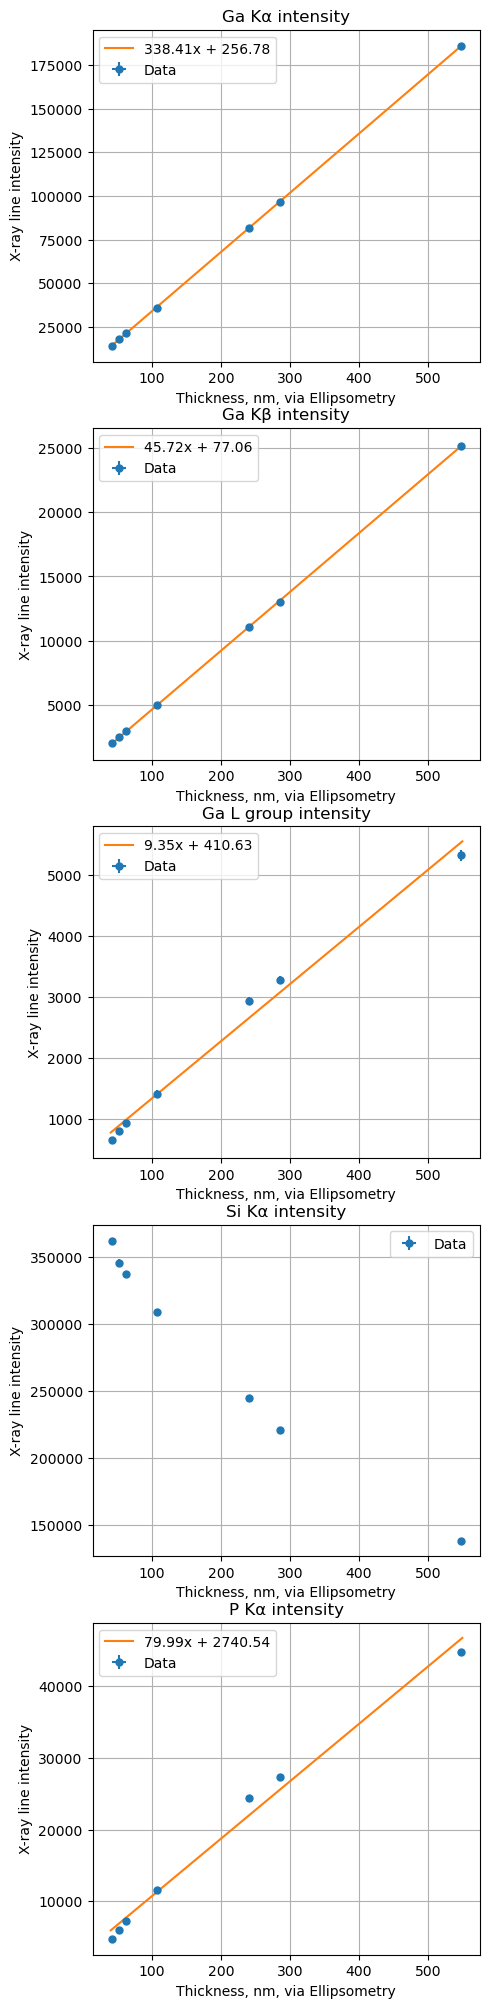

In [4]:
f, axs = plt.subplots(nrows=5, ncols=1, figsize=(5, 25))

ms = 10 #marker size
                      
axs[0].errorbar(all_data[0:, 3], all_data[0:, 5], xerr=all_data[0:, 4], yerr = all_data[0:, 10],
            linestyle="None", marker=".", markersize=ms, label = "Data")

axs[1].errorbar(all_data[0:, 3], all_data[0:, 6], xerr=all_data[0:, 4], yerr = all_data[0:, 11],
            linestyle="None", marker=".", markersize=ms, label = "Data")

axs[2].errorbar(all_data[0:, 3], all_data[0:, 7], xerr=all_data[0:, 4], yerr = all_data[0:, 12],
            linestyle="None", marker=".", markersize=ms, label = "Data")

axs[3].errorbar(all_data[0:, 3], all_data[0:, 8], xerr=all_data[0:, 4], yerr = all_data[0:, 13],
            linestyle="None", marker=".", markersize=ms, label = "Data")
#axs[3].set_yscale("log")

axs[4].errorbar(all_data[0:, 3], all_data[0:, 9], xerr=all_data[0:, 4], yerr = all_data[0:, 14],
            linestyle="None", marker=".", markersize=ms, label = "Data")

fit_ga_ka = simpleLinReg(all_data[0:,3], all_data[0:,5])
fit_ga_kb = simpleLinReg(all_data[0:,3], all_data[0:,6])
fit_ga_l  = simpleLinReg(all_data[0:,3], all_data[0:,7])
fit_p_ka  = simpleLinReg(all_data[0:,3], all_data[0:,9])

axs[0].plot(np.linspace(40, 550), np.linspace(40, 550)*fit_ga_ka[0] + fit_ga_ka[1],
            label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_ka))
axs[1].plot(np.linspace(40, 550), np.linspace(40, 550)*fit_ga_kb[0] + fit_ga_kb[1],
           label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_kb))
axs[2].plot(np.linspace(40, 550), np.linspace(40, 550)*fit_ga_l[0] + fit_ga_l[1],
           label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_l))
axs[4].plot(np.linspace(40, 550), np.linspace(40, 550)*fit_p_ka[0] + fit_p_ka[1],
           label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_p_ka))

titles = ["Ga K\u03b1 intensity",
          "Ga K\u03b2 intensity",
          "Ga L group intensity",
          "Si K\u03b1 intensity",
          "P K\u03b1 intensity"]

for i in range(0, axs.size):
    axs[i].grid(True)
    axs[i].set_xlabel("Thickness, nm, via Ellipsometry")
    axs[i].set_ylabel("X-ray line intensity")
    axs[i].set_title(titles[i])
    axs[i].legend()

plt.show()

# Plot XRR results vs ellipsometry

0.9756927467041053 1.6743096032900269


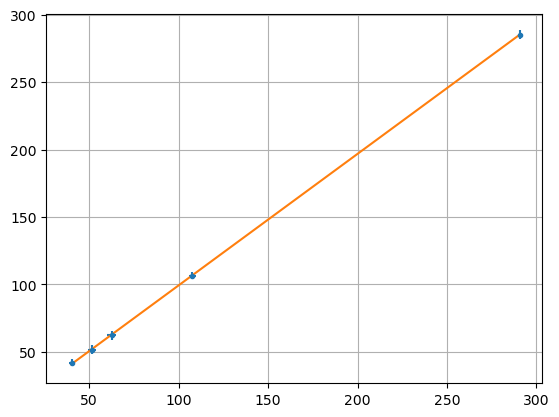

In [6]:
f, ax = plt.subplots()

fit = simpleLinReg(all_data[0:,1][mask], all_data[0:,3][mask])

ax.errorbar(all_data[0:,1][mask], all_data[0:,3][mask],
            xerr=all_data[0:,2][mask], yerr=all_data[0:, 4][mask], fmt=".")
ax.plot(np.linspace(40, 290), np.linspace(40, 290)*fit[0] + fit[1])

ax.grid(True)

print(fit[0], fit[1])

plt.show()